<a href="https://colab.research.google.com/github/2303A51780/2303a51780-applications-of-datamining/blob/main/regressions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

     Ash   Acl
0  14.23  1.71
1  13.20  1.78
2  13.16  2.36
3  14.37  1.95
4  13.24  2.59


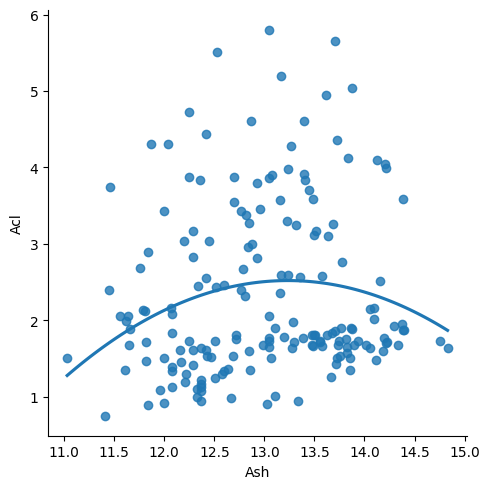

-0.012507386210374616


<ipython-input-10-a70598f992e9>:19: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_binary.fillna(method ='ffill', inplace = True)
<ipython-input-10-a70598f992e9>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_binary.fillna(method ='ffill', inplace = True)
<ipython-input-10-a70598f992e9>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_binary.dropna(inplace = True)


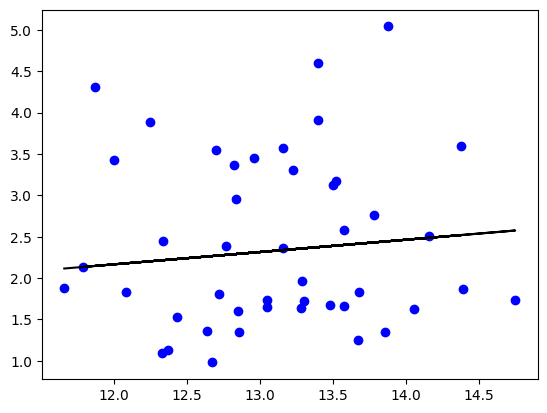

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
df = pd.read_csv('/content/wine.csv')
df_binary = df[['Alcohol', 'Malic.acid']]

# Taking only the selected two attributes from the dataset
df_binary.columns = ['Ash', 'Acl']
#display the first 5 rows
print(df_binary.head())
#plotting the Scatter plot to check relationship between Ash and Acl
sns.lmplot(x ="Ash", y ="Acl", data = df_binary, order = 2, ci = None)
plt.show()
# Eliminating NaN or missing input numbers
df_binary.fillna(method ='ffill', inplace = True)
X = np.array(df_binary['Ash']).reshape(-1, 1)
# The error was in this line. You were trying to access a column with an empty string name.
# Instead you wanted to access the 'Acl' column.
y = np.array(df_binary['Acl']).reshape(-1, 1)

# Separating the data into independent and dependent variables
# Converting each dataframe into a numpy array
# since each dataframe contains only one column
df_binary.dropna(inplace = True)

# Dropping any rows with Nan values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Splitting the data into training and testing data
model= LinearRegression()

model.fit(X_train, y_train)
print(model.score(X_test, y_test))
y_pred = model.predict(X_test)
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')

plt.show()
# Data scatter of predicted values

Column Names: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


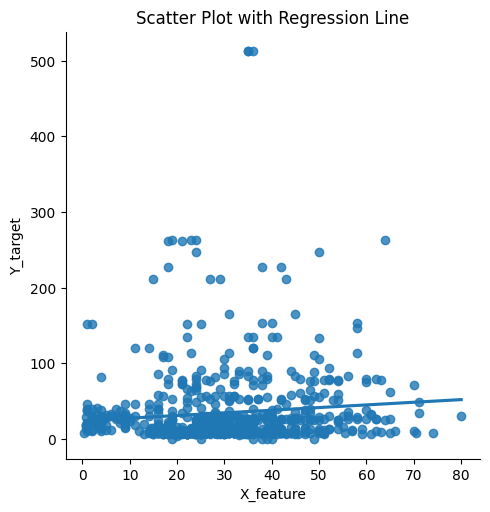

Model Score: 0.001369139534141195


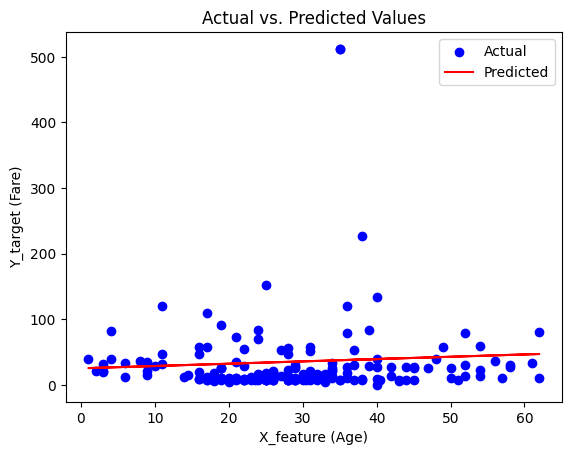

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load the dataset
file_path = "/content/titanic.csv"
df = pd.read_csv(file_path)

# Display column names to find numerical columns
print("Column Names:", df.columns)

# Selecting numerical columns for regression (modify based on dataset)
# Example: Using 'Age' as X and 'Fare' as Y if they exist
if {'Age', 'Fare'}.issubset(df.columns):
    df_binary = df[['Age', 'Fare']].dropna()
    df_binary.columns = ['X_feature', 'Y_target']
else:
    raise ValueError("The dataset does not contain required numerical columns.")

# Scatter plot to visualize the relationship
sns.lmplot(x="X_feature", y="Y_target", data=df_binary, order=1, ci=None)
plt.title("Scatter Plot with Regression Line")
plt.show()

# Prepare data for regression
X = np.array(df_binary['X_feature']).reshape(-1, 1)
y = np.array(df_binary['Y_target']).reshape(-1, 1)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Print model accuracy
print("Model Score:", model.score(X_test, y_test))

# Predict using the test set
y_pred = model.predict(X_test)

# Scatter plot of actual vs. predicted values
plt.scatter(X_test, y_test, color='b', label="Actual")
plt.plot(X_test, y_pred, color='r', label="Predicted")
plt.xlabel("X_feature (Age)")
plt.ylabel("Y_target (Fare)")
plt.legend()
plt.title("Actual vs. Predicted Values")
plt.show()


Column Names: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85      

<ipython-input-15-d3ce215cc381>:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-15-d3ce215cc381>:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 


Model Accuracy: 79.89%


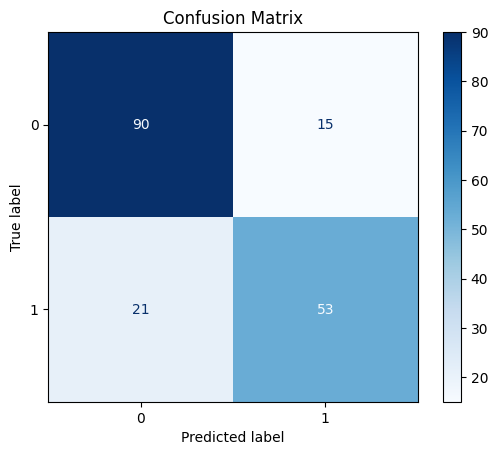


Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



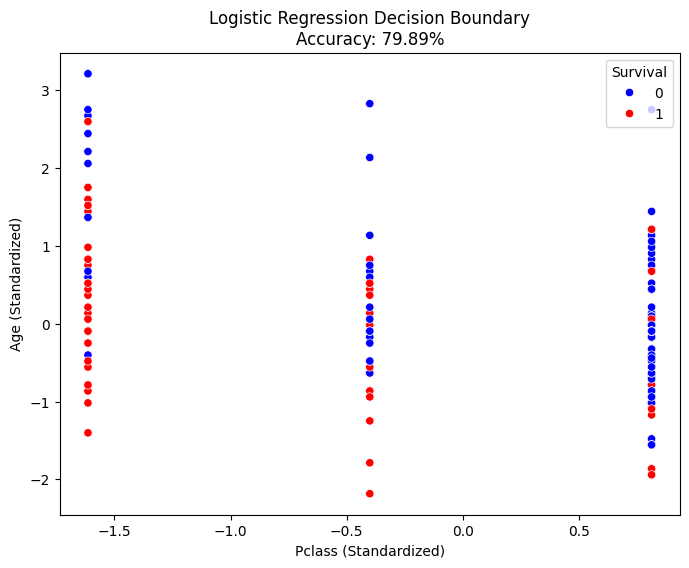

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Load the dataset
file_path = "/content/titanic.csv"
df = pd.read_csv(file_path)

# Display column names and first few rows to understand the dataset
print("Column Names:", df.columns)
print(df.head())

# Selecting relevant features
# Keeping 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', and 'Fare' as independent variables
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
target = 'Survived'

# Handle missing values: Fill 'Age' with the median
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)

# Convert categorical variable 'Sex' into numerical (0 for male, 1 for female)
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])

# Define features (X) and target variable (y)
X = df[features]
y = df[target]

# Split the dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Model Predictions
y_pred = model.predict(X_test)

# Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print("\nModel Accuracy: {:.2f}%".format(accuracy * 100))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Visualizing Decision Boundary (Approximated with Two Features)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 2], hue=y_test, palette={0: 'blue', 1: 'red'}, marker='o')
plt.xlabel("Pclass (Standardized)")
plt.ylabel("Age (Standardized)")
plt.title("Logistic Regression Decision Boundary\nAccuracy: {:.2f}%".format(accuracy * 100))
plt.legend(title="Survival", loc="upper right")
plt.show()


Accuracy: 78.73%

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.92      0.84       165
           1       0.82      0.57      0.67       103

    accuracy                           0.79       268
   macro avg       0.80      0.75      0.76       268
weighted avg       0.79      0.79      0.78       268


Decision Tree rules:
|--- Sex <= 0.50
|   |--- Pclass <= 2.50
|   |   |--- Fare <= 28.86
|   |   |   |--- Age <= 28.23
|   |   |   |   |--- SibSp <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- SibSp >  0.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- Age >  28.23
|   |   |   |   |--- class: 0
|   |   |--- Fare >  28.86
|   |   |   |--- Parch <= 1.50
|   |   |   |   |--- class: 1
|   |   |   |--- Parch >  1.50
|   |   |   |   |--- Fare <= 135.78
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Fare >  135.78
|   |   |   |   |   |--- class: 1
|   |--- Pclass >  2.50
|   |   |--- Fare <= 7.89
|   |

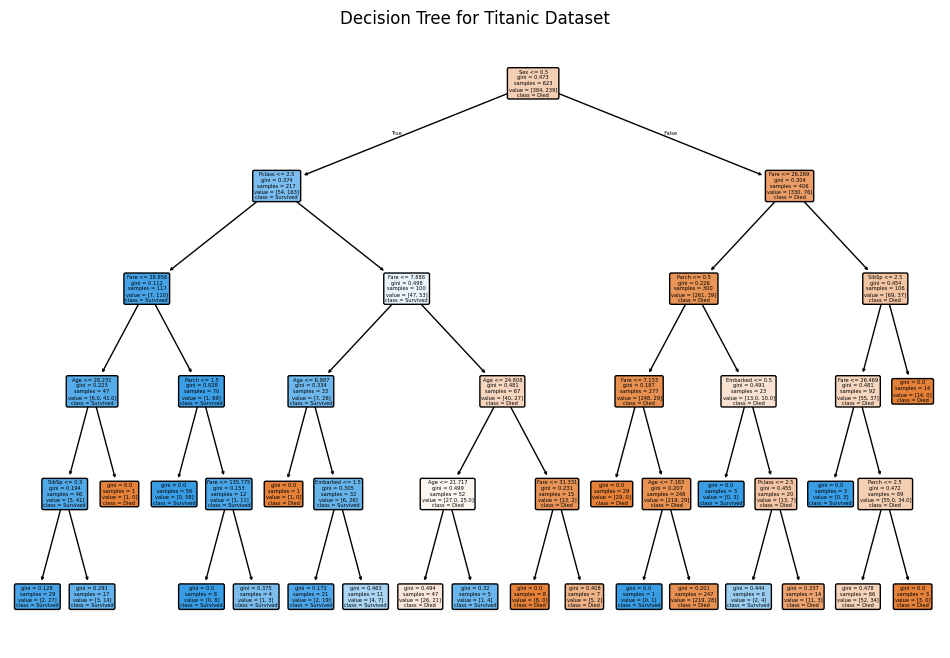

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report

# Load the Titanic dataset
file_path = "/content/titanic.csv"
df = pd.read_csv(file_path)

# Selecting relevant features
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
target = 'Survived'

df = df[features + [target]]

# Handling missing values
imputer = SimpleImputer(strategy='most_frequent')
df['Age'] = imputer.fit_transform(df[['Age']])
df['Fare'] = imputer.fit_transform(df[['Fare']])
df['Age'] = imputer.fit_transform(df[['Fare']])

# Encoding categorical features
label_encoders = {}
for col in ['Sex', 'Embarked']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Splitting data into training and testing sets
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Creating and training the Decision Tree model
clf = DecisionTreeClassifier(random_state=42, max_depth=5)
clf.fit(X_train, y_train)

# Making predictions
y_pred = clf.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Displaying Decision Tree rules
print("\nDecision Tree rules:")
print(export_text(clf, feature_names=features))

# Plotting the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=features, class_names=['Died', 'Survived'], rounded=True)
plt.title("Decision Tree for Titanic Dataset")
plt.show()



Wine Dataset - Accuracy: 96.30%

Classification Report (Wine):
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        19
           1       0.95      1.00      0.98        21
           2       1.00      0.93      0.96        14

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.96        54
weighted avg       0.96      0.96      0.96        54


Wine Dataset - Decision Tree Rules:
|--- color_intensity <= 3.82
|   |--- proline <= 1010.00
|   |   |--- ash <= 3.07
|   |   |   |--- class: 1
|   |   |--- ash >  3.07
|   |   |   |--- class: 0
|   |--- proline >  1010.00
|   |   |--- class: 0
|--- color_intensity >  3.82
|   |--- flavanoids <= 1.40
|   |   |--- class: 2
|   |--- flavanoids >  1.40
|   |   |--- proline <= 724.50
|   |   |   |--- alcohol <= 13.14
|   |   |   |   |--- class: 1
|   |   |   |--- alcohol >  13.14
|   |   |   |   |--- class: 0
|   |   |--- proline >  724.50
|   |   |  

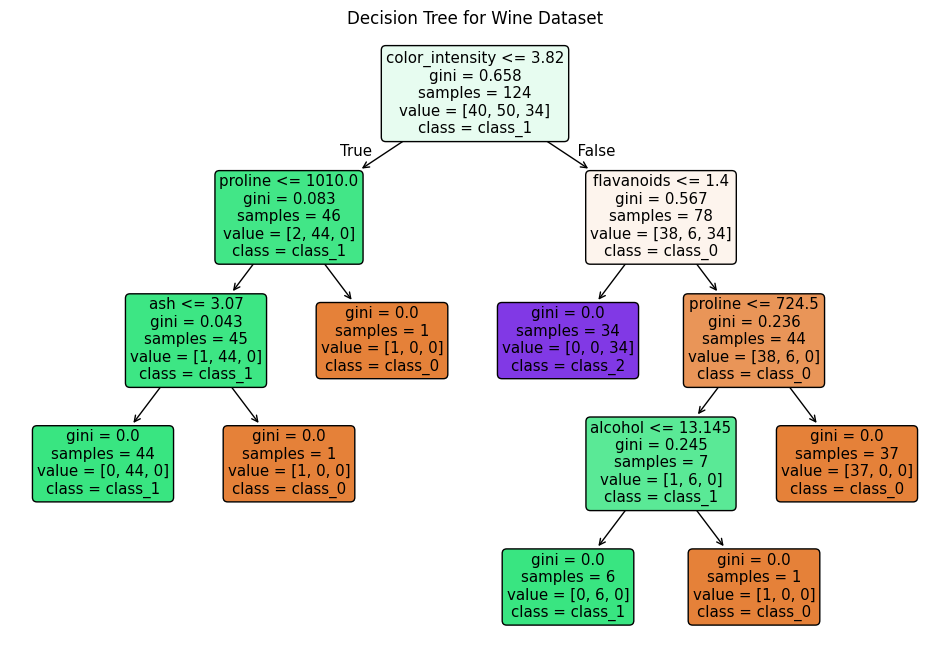

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.datasets import load_wine
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import export_text
wine = load_wine()
X_wine = wine.data  # Features
y_wine = wine.target  # Labels

# Splitting the data
X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(X_wine, y_wine, test_size=0.3, random_state=42)

# Creating and training Decision Tree model
clf_wine = DecisionTreeClassifier(random_state=42)
clf_wine.fit(X_train_wine, y_train_wine)

# Predictions
y_pred_wine = clf_wine.predict(X_test_wine)

# Evaluating the model
print(f"\nWine Dataset - Accuracy: {accuracy_score(y_test_wine, y_pred_wine) * 100:.2f}%")
print("\nClassification Report (Wine):\n", classification_report(y_test_wine, y_pred_wine))

# Decision Tree rules
print("\nWine Dataset - Decision Tree Rules:")
print(export_text(clf_wine, feature_names=wine.feature_names))

# Plot the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(clf_wine, filled=True, feature_names=wine.feature_names, class_names=[str(c) for c in wine.target_names], rounded=True)
plt.title("Decision Tree for Wine Dataset")
plt.show()